In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
def load_data():
    df = pd.read_csv('/Users/pipepatino/Documents/Analisis_Visualizacion_2024_2/Laboratorios/2024-2-LAB-08-matplotlib-dashboard-Pipepatino/files/input/shipping-data.csv')
    return df

df = load_data()
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


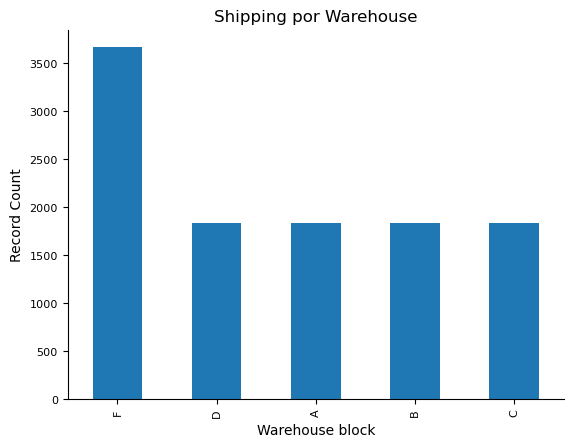

In [7]:
def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title = 'Shipping por Warehouse',
        xlabel = 'Warehouse block',
        ylabel = 'Record Count',
        color = 'tab:blue',
        fontsize = 8
    )

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.savefig('shipping_per_warehouse.png')
    return

create_visual_for_shipping_per_warehouse(df)

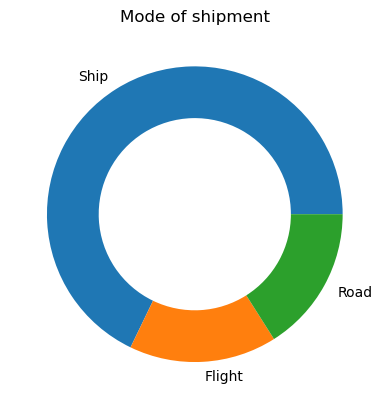

In [9]:
def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = 'Mode of shipment',
        wedgeprops = dict(width = 0.35),
        ylabel = '',
        color = [ 'tab:blue', 'tab:orange', 'tab:green'],
    )
    plt.savefig('mode_of_shipment.png')
    return

df = load_data()
create_visual_for_mode_of_shipment(df)

In [ ]:
def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[['Mode_of_Shipment', 'Customer_rating', ]]
    )

In [ ]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)

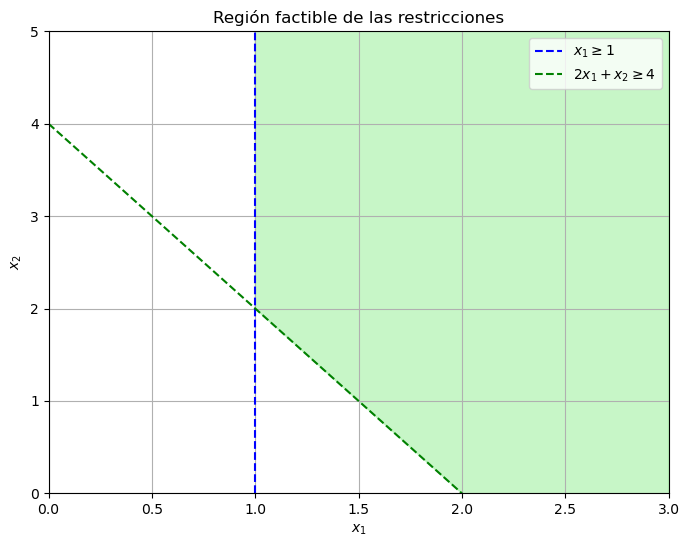

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la región factible
x1 = np.linspace(0, 3, 400)  # Valores de x1

# Restricción 1: x1 >= 1
x1_boundary = 1  # Línea vertical x1 = 1

# Restricción 2: 2x1 + x2 >= 4 -> x2 >= 4 - 2x1
x2_boundary = 4 - 2 * x1  # x2 como función de x1

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Restricción 1: x1 >= 1
plt.axvline(x=x1_boundary, color="blue", linestyle="--", label=r"$x_1 \geq 1$")

# Restricción 2: x2 >= 4 - 2x1
plt.plot(x1, x2_boundary, color="green", linestyle="--", label=r"$2x_1 + x_2 \geq 4$")
plt.fill_between(x1, x2_boundary, 10, where=(x1 >= x1_boundary), color="lightgreen", alpha=0.5)

# Ajustes del gráfico
plt.xlim(0, 3)
plt.ylim(0, 5)
plt.axhline(y=0, color="black", linewidth=0.5)
plt.axvline(x=0, color="black", linewidth=0.5)
plt.title("Región factible de las restricciones")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [11]:
import numpy as np

def projection(v, u):
    """
    Proyección ortogonal del vector v sobre el vector u.

    Args:
        v (np.array): Vector que se quiere proyectar.
        u (np.array): Vector dirección de la recta.

    Returns:
        np.array: Proyección de v sobre u.
    """
    dot_product = np.dot(v, u)  # Producto punto v . u
    norm_u_squared = np.dot(u, u)  # Norma al cuadrado de u
    projection = (dot_product / norm_u_squared) * u  # Proyección
    return projection

# Ejemplo
v = np.array([3, 4])
u = np.array([1, 2])

proj = projection(v, u)
print("Vector original (v):", v)
print("Vector dirección (u):", u)
print("Proyección de v sobre u:", proj)


Vector original (v): [3 4]
Vector dirección (u): [1 2]
Proyección de v sobre u: [2.2 4.4]


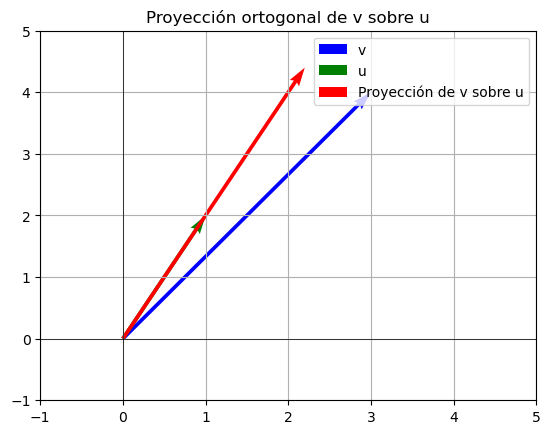

In [12]:
import matplotlib.pyplot as plt

# Vectores
origin = [0, 0]
v = np.array([3, 4])
u = np.array([1, 2])
proj = projection(v, u)

# Gráfica
plt.quiver(*origin, *v, angles="xy", scale_units="xy", scale=1, color="blue", label="v")
plt.quiver(*origin, *u, angles="xy", scale_units="xy", scale=1, color="green", label="u")
plt.quiver(*origin, *proj, angles="xy", scale_units="xy", scale=1, color="red", label="Proyección de v sobre u")

# Configuración
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.legend()
plt.title("Proyección ortogonal de v sobre u")
plt.show()


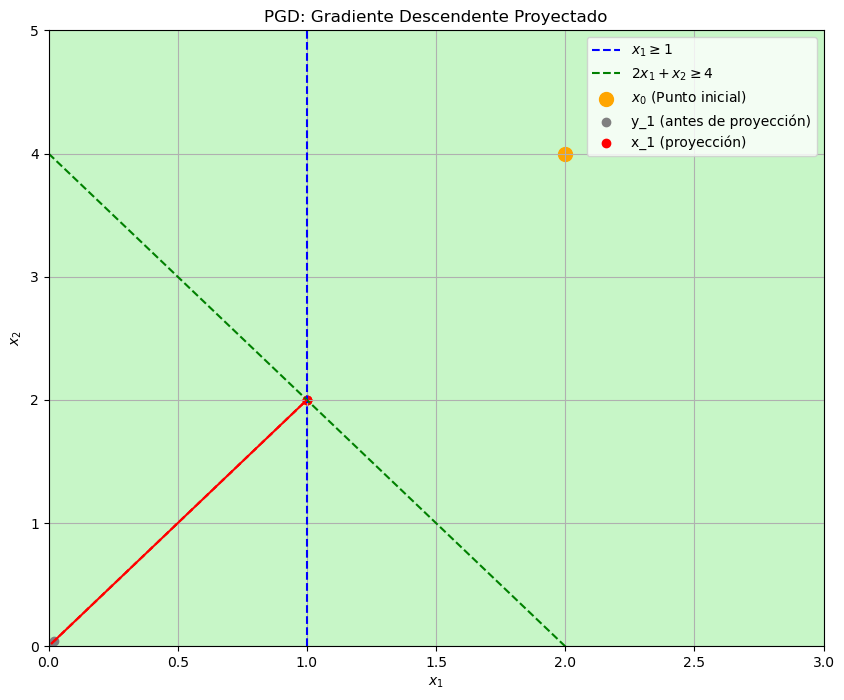

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Función gradiente
def gradient(x):
    return x  # Gradiente de f(x1, x2) = 1/2 * (x1^2 + x2^2)

# Proyección sobre la región factible
def project_region(x):
    x1, x2 = x

    # Restricción 1: x1 >= 1
    x1 = max(x1, 1)

    # Restricción 2: 2x1 + x2 >= 4
    if 2 * x1 + x2 < 4:
        x2 = 4 - 2 * x1

    return np.array([x1, x2])

# Parámetros
alpha = 0.99  # Tasa de aprendizaje
x = np.array([2.0, 4.0])  # Punto inicial
n_iterations = 3

# Almacenar puntos para graficar
points = [x.copy()]  # Punto inicial
projections = []  # Proyecciones realizadas

# Gradiente Descendente Proyectado
for k in range(n_iterations):
    # Paso de gradiente
    y = x - alpha * gradient(x)
    projections.append(y)  # Almacenar punto antes de proyectar
    # Proyección
    x = project_region(y)
    points.append(x.copy())  # Almacenar punto proyectado

# Convertir puntos a arrays para graficar
points = np.array(points)
projections = np.array(projections)

# Crear la gráfica
x1 = np.linspace(0, 3, 400)  # Valores de x1
x2 = np.linspace(0, 5, 400)
X1, X2 = np.meshgrid(x1, x2)

# Restricciones
region = (X1 >= 1) & (2 * X1 + X2 >= 4)

# Graficar la región factible
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, region, levels=[0, 1], colors=["lightgreen"], alpha=0.5)
plt.axvline(x=1, color="blue", linestyle="--", label=r"$x_1 \geq 1$")
plt.plot(x1, 4 - 2 * x1, color="green", linestyle="--", label=r"$2x_1 + x_2 \geq 4$")

# Graficar el punto inicial
plt.scatter([2], [4], color="orange", label="$x_0$ (Punto inicial)", s=100)

# Graficar puntos de iteraciones y proyecciones
for i, (proj, point) in enumerate(zip(projections, points[1:])):
    # Punto antes de proyectar (y_{k+1})
    plt.scatter(proj[0], proj[1], color="gray", label=f"y_{i+1} (antes de proyección)" if i == 0 else "")
    # Línea entre y_{k+1} y x_{k+1}
    plt.plot([proj[0], point[0]], [proj[1], point[1]], color="red", linestyle="--")
    # Punto proyectado (x_{k+1})
    plt.scatter(point[0], point[1], color="red", label=f"x_{i+1} (proyección)" if i == 0 else "")

# Ajustar la gráfica
plt.xlim(0, 3)
plt.ylim(0, 5)
plt.axhline(y=0, color="black", linewidth=0.5)
plt.axvline(x=0, color="black", linewidth=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("PGD: Gradiente Descendente Proyectado")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


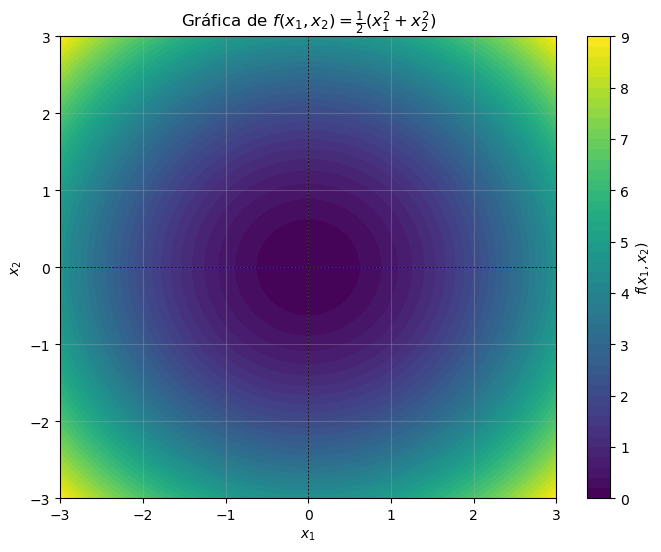

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x1, x2)
def f(x1, x2):
    return 0.5 * (x1**2 + x2**2)

# Crear una malla de puntos en el espacio (x1, x2)
x1 = np.linspace(-3, 3, 100)  # Rango de valores para x1
x2 = np.linspace(-3, 3, 100)  # Rango de valores para x2
X1, X2 = np.meshgrid(x1, x2)  # Crear malla 2D

# Calcular f(x1, x2) en cada punto de la malla
Z = f(X1, X2)

# Crear la gráfica
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, Z, levels=50, cmap="viridis")  # Contornos sombreados
plt.colorbar(contour, label=r"$f(x_1, x_2)$")  # Barra de colores

# Etiquetas y configuraciones
plt.title(r"Gráfica de $f(x_1, x_2) = \frac{1}{2}(x_1^2 + x_2^2)$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")  # Eje x
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")  # Eje y
plt.grid(alpha=0.3)

# Mostrar la gráfica
plt.show()


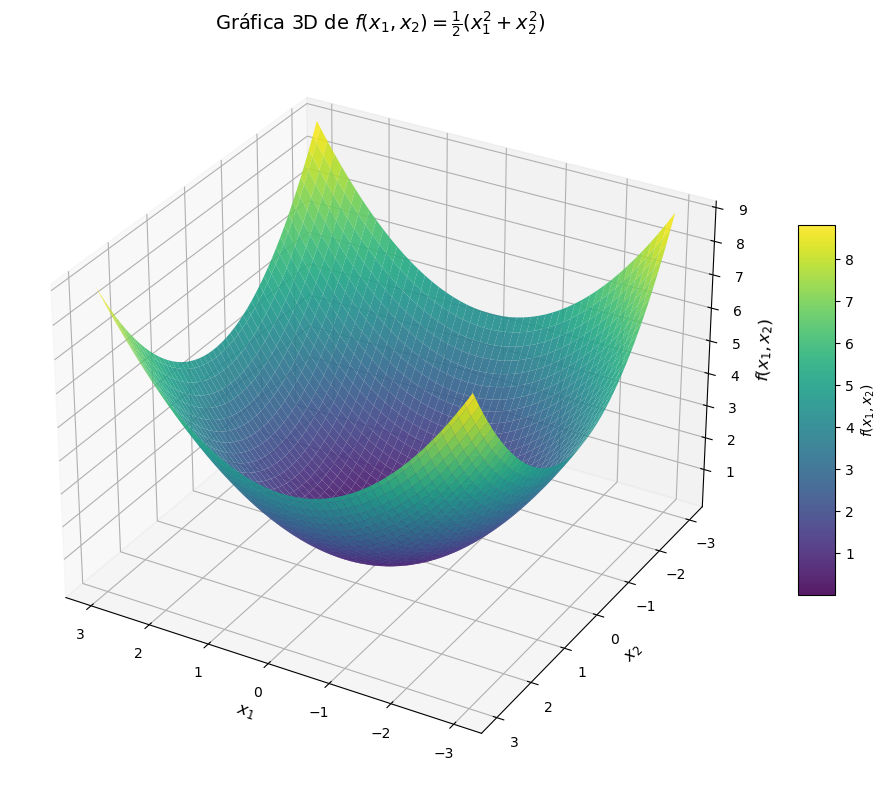

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función f(x1, x2)
def f(x1, x2):
    return 0.5 * (x1**2 + x2**2)

# Crear una malla de puntos en el espacio (x1, x2)
x1 = np.linspace(-3, 3, 100)  # Rango de valores para x1
x2 = np.linspace(-3, 3, 100)  # Rango de valores para x2
X1, X2 = np.meshgrid(x1, x2)  # Crear malla 2D

# Calcular f(x1, x2) en cada punto de la malla
Z = f(X1, X2)

# Crear la gráfica 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie 3D
surface = ax.plot_surface(X1, X2, Z, cmap="viridis", edgecolor='none', alpha=0.9)

# Agregar una barra de colores
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label=r"$f(x_1, x_2)$")

# Configuración de la gráfica
ax.set_title(r"Gráfica 3D de $f(x_1, x_2) = \frac{1}{2}(x_1^2 + x_2^2)$", fontsize=14)
ax.set_xlabel(r"$x_1$", fontsize=12)
ax.set_ylabel(r"$x_2$", fontsize=12)
ax.set_zlabel(r"$f(x_1, x_2)$", fontsize=12)
ax.view_init(elev=30, azim=120)  # Ajustar la vista 3D
plt.tight_layout()

# Mostrar la gráfica
plt.show()
